In [1]:
import os

In [2]:
path = "D:\FYP\Datasets\dataset1\segmented-oxy-deoxy"
file_list = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
print(len(file_list))

1088


In [3]:
print(file_list[0])

sub_13_10_3.csv


In [4]:
oxy_out,deoxy_out=[],[]
oxy_files,deoxy_files=[],[]
for name in file_list:
    if name[-11]=='d':
        deoxy_files.append(name)
        deoxy_out.append(int(name[-5]))
    else:
        oxy_files.append(name)
        oxy_out.append(int(name[-5]))

In [5]:
print(deoxy_out)

[3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 

In [6]:
print(len(deoxy_files))

1088


In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

from keras.layers import Dense
from keras.layers import Dropout

from keras.layers import BatchNormalization



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14008\3325506834.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
sequences = list()
for i in deoxy_files:
    file_path = path + '\\'+i
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df=df.drop(['Unnamed: 0','AB_I_DO'],axis=1)
    values = df.values
    sequences.append(values)

In [9]:
print(len(sequences))
print(sequences[0])

1088
[[ 0.22813519]
 [ 0.23048361]
 [ 0.23619982]
 [ 0.24600661]
 [ 0.26046756]
 [ 0.27993301]
 [ 0.30449142]
 [ 0.3339323 ]
 [ 0.36772713]
 [ 0.4050335 ]
 [ 0.44472574]
 [ 0.48545216]
 [ 0.52571568]
 [ 0.56397108]
 [ 0.59872948]
 [ 0.62865924]
 [ 0.65267227]
 [ 0.669987  ]
 [ 0.68016204]
 [ 0.6830989 ]
 [ 0.67901646]
 [ 0.66840333]
 [ 0.65195722]
 [ 0.63052067]
 [ 0.60502216]
 [ 0.57642858]
 [ 0.54571229]
 [ 0.51383176]
 [ 0.48172212]
 [ 0.45028982]
 [ 0.42040507]
 [ 0.39288701]
 [ 0.36847866]
 [ 0.34781198]
 [ 0.33136631]
 [ 0.31942605]
 [ 0.31204464]
 [ 0.30902203]
 [ 0.3099013 ]
 [ 0.31398736]
 [ 0.32038794]
 [ 0.3280733 ]
 [ 0.33594898]
 [ 0.34293379]
 [ 0.348035  ]
 [ 0.3504134 ]
 [ 0.34943249]
 [ 0.34468864]
 [ 0.33602146]
 [ 0.32350595]
 [ 0.30742955]
 [ 0.28825837]
 [ 0.26659668]
 [ 0.24314366]
 [ 0.21865036]
 [ 0.19387922]
 [ 0.16956748]
 [ 0.14639575]
 [ 0.12496243]
 [ 0.10576491]
 [ 0.08918818]
 [ 0.0755013 ]
 [ 0.06486146]
 [ 0.05732472]
 [ 0.05286134]
 [ 0.05137291]
 [ 0.

In [10]:
print(deoxy_out)

[3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2, 0, 1, 2, 3, 1, 2, 

In [11]:
len_sequences = []
for one_seq in sequences:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).describe()

count    1088.000000
mean      425.937500
std         0.242173
min       425.000000
25%       426.000000
50%       426.000000
75%       426.000000
max       426.000000
dtype: float64

In [12]:
new_sequences=[]
for i in range(len(sequences)):
    new_sequences.append(sequences[i][:425])


len_sequences = []
for one_seq in new_sequences:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).describe()

count    1088.0
mean      425.0
std         0.0
min       425.0
25%       425.0
50%       425.0
75%       425.0
max       425.0
dtype: float64

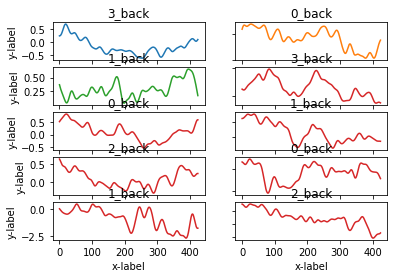

In [14]:
x=range(0,425)
fig, axs = plt.subplots(5, 2)
axs[0, 0].plot(x, new_sequences[0])
axs[0, 0].set_title(str(deoxy_out[0])+'_back')
axs[0, 1].plot(x, new_sequences[1], 'tab:orange')
axs[0, 1].set_title(str(deoxy_out[1])+'_back')
axs[1, 0].plot(x, new_sequences[2], 'tab:green')
axs[1, 0].set_title(str(deoxy_out[2])+'_back')
axs[1, 1].plot(x, new_sequences[3], 'tab:red')
axs[1, 1].set_title(str(deoxy_out[3])+'_back')
axs[2, 0].plot(x, new_sequences[4], 'tab:red')
axs[2, 0].set_title(str(deoxy_out[4])+'_back')
axs[2, 1].plot(x, new_sequences[5], 'tab:red')
axs[2, 1].set_title(str(deoxy_out[5])+'_back')
axs[3, 0].plot(x, new_sequences[6], 'tab:red')
axs[3, 0].set_title(str(deoxy_out[6])+'_back')
axs[3, 1].plot(x, new_sequences[7], 'tab:red')
axs[3, 1].set_title(str(deoxy_out[7])+'_back')
axs[4, 0].plot(x, new_sequences[8], 'tab:red')
axs[4, 0].set_title(str(deoxy_out[8])+'_back')
axs[4, 1].plot(x, new_sequences[9], 'tab:red')
axs[4, 1].set_title(str(deoxy_out[9])+'_back')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

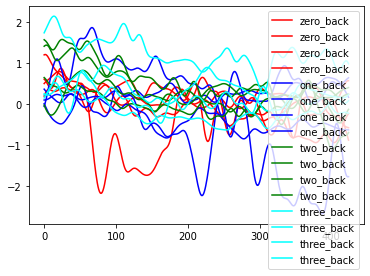

In [21]:
zero,one,two,three=[],[],[],[]
for i in range(16):
    if deoxy_out[i]==0:
        zero.append(i)
    elif deoxy_out[i]==1:
        one.append(i)
    elif deoxy_out[i]==2:
        two.append(i)
    else:
        three.append(i)
    
for i in zero:
    plt.plot(x, new_sequences[i], color='r', label=str('zero_back') )
for i in one:
    plt.plot(x, new_sequences[i], color='b', label=str('one_back') )
for i in two:
    plt.plot(x, new_sequences[i], color='g', label=str('two_back') )
for i in three:
    plt.plot(x, new_sequences[i], color='cyan', label=str('three_back') )
plt.legend()


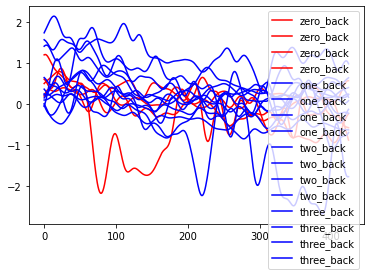

In [40]:
zero,one,two,three=[],[],[],[]
for i in range(16):
    if deoxy_out[i]==0:
        zero.append(i)
    elif deoxy_out[i]==1:
        one.append(i)
    elif deoxy_out[i]==2:
        two.append(i)
    else:
        three.append(i)
    
for i in zero:
    plt.plot(x, new_sequences[i], color='r', label=str('zero_back') )
for i in one:
    plt.plot(x, new_sequences[i], color='b', label=str('one_back') )
for i in two:
    plt.plot(x, new_sequences[i], color='b', label=str('two_back') )
for i in three:
    plt.plot(x, new_sequences[i], color='b', label=str('three_back') )
plt.legend()


In [20]:
print(one)
print(two)
print(three)
print(zero)

[2, 5, 8, 11]
[6, 9, 12, 15]
[0, 3, 10, 13]
[1, 4, 7, 14]


In [22]:
y=[]
for i in range(len(deoxy_out)):
    if deoxy_out[i]==0:
        y.append(0)
    else:
        y.append(1)

In [26]:
y=np.array(y)
pd.Series(y).describe()

count    1088.000000
mean        0.750000
std         0.433212
min         0.000000
25%         0.750000
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
new_sequences=np.array(new_sequences)
deoxy_out=np.array(deoxy_out)
X_train, X_test, y_train, y_test = train_test_split(new_sequences, y, test_size = 0.2, random_state = 0)

In [28]:
def deoxymdl():
    model = Sequential()
    model.add(Dense(100, input_dim=425, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(.3))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [29]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [39]:

graph_model = deoxymdl()
graph_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split = .15, verbose = 1)

scores = graph_model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (graph_model.metrics_names[1], scores[1]*100))

Epoch 1/30
24/24 [==============================] - 3s 20ms/step - loss: 0.8870 - accuracy: 0.4682 - val_loss: 0.6572 - val_accuracy: 0.7176
Epoch 2/30
24/24 [==============================] - 0s 7ms/step - loss: 0.7041 - accuracy: 0.5480 - val_loss: 0.6265 - val_accuracy: 0.7023
Epoch 3/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6214 - accuracy: 0.6184 - val_loss: 0.6099 - val_accuracy: 0.7023
Epoch 4/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6093 - accuracy: 0.6631 - val_loss: 0.5969 - val_accuracy: 0.7023
Epoch 5/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6121 - accuracy: 0.6793 - val_loss: 0.5860 - val_accuracy: 0.7099
Epoch 6/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6081 - accuracy: 0.6468 - val_loss: 0.5773 - val_accuracy: 0.7252
Epoch 7/30
24/24 [==============================] - 0s 7ms/step - loss: 0.5680 - accuracy: 0.6928 - val_loss: 0.5768 - val_accuracy: 0.7099
Epoch 8/30
24/24 [=

In [31]:
print(X_train.shape)
print(y_train.shape)

(870, 425, 1)
(870,)


In [1]:
from tensorflow import keras

In [4]:
model = keras.models.load_model(r"C:\Users\ASUS\Downloads\model-dense.h5")


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 39)]              0         
                                                                 
 dense (Dense)               (None, 128)               5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________
